In [1]:
import numpy as np
import pyDR as DR
from pyDR.Project import Project
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import pickle

In [2]:
ile_resn = [3, 13, 23, 30, 36, 44, 61]
test_list = ["test_001", "test_002", "test_003", "test_004"]

In [3]:
data = []
for test in test_list:
    out=pickle.load(open("/home/mlehner/pyDR/out_figures/ile/"+test+"/out2.p", 'rb'))
    data.append(out)

In [4]:
data[0]["ct_prod"].shape

(42, 200000)

In [5]:
out["ct_finF"].shape

(7, 42, 200000)

In [6]:
include=np.zeros([3,9],dtype=bool)
include[0][:3]=True  
include[1][[4,6,8]]=True
include[2][3:]=True
tf=200000
t=np.arange(tf>>1)*.005

In [7]:
def creat_split_plots(out):    
    titles=[['Methyl rot.',r'$\chi_2$ rot.',r'$\chi_1$ rot.',r'C$\alpha$-C$\beta$ motion','Total'],
                ['Methyl rot.',r'$\chi_2$ rot.',r'$\chi_1$ rot.',r'C$\alpha$-C$\beta$ motion','Total'],
                ['Methyl lib.','Methyl hop.',r'$\chi_2$ lib.',r'$\chi_2$ hop.',
                r'$\chi_1$ lib.',r'$\chi_1$ hop.',r'C$\alpha$-C$\beta$ motion','Total']]
    fig=plt.figure('Methyl Dynamics')
    fig.clear()
    fig.set_size_inches([10.27,  9.03])
    ax=[]
    ax.append([fig.add_subplot(5,3,k+1) for k in range(0,15,3)])
    ax.append([fig.add_subplot(5,3,k+1) for k in range(1,15,3)])
    ax.append([fig.add_subplot(5,6,k+1) for k in [4,5,10,11,16,17,22]])
    ax[-1].append(fig.add_subplot(5,3,15))

    for a0,t0 in zip(ax,titles):
        for a, title in zip(a0,t0):
            a.set_title(title)

    i = 0
    j = 0
    for inc,ax0 in zip(include,ax):
        i += 1        
        for ct,a in zip(out['ct_finF'],ax0):
            j += 1
            try:
                a.cla()
                a.plot(t,ct.mean(0)[:tf>>1])
                a.set_ylim([0,1.05])
                S2=ct.mean(0)[tf>>2:tf>>1].mean()
                b=np.argwhere(ct.mean(0)-S2<0)[0,0]
                #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
                tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
                fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
                S2,tc=least_squares(fun,[S2,tc0]).x
                a.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
                a.set_xlim([0,50*tc])
                #a.set_xlim([0,np.min([10*tc, out['t'][:tf>>1]])])
                a.set_title(f"{i}-{j}")
            except:
                pass
        ax0[-1].semilogx(out['t'][:tf>>1],out['ct'].mean(0)[:tf>>1])
        ax0[-1].semilogx(out['t'][:tf>>1],out['ct_prod'].mean(0)[:tf>>1])
        ax0[-1].set_ylim([0,.5])
        
    fig.set_size_inches([180/25.4,220/25.4])

    #plt.savefig("/home/mlehner/pyDR/out_figures/ile/"+test+"/frame_ile_"+str(resnum)+".pdf")

    plt.show()

/home/mlehner/anaconda3/envs/pyDR/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in square
/home/mlehner/anaconda3/envs/pyDR/lib/python3.7/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/mlehner/anaconda3/envs/pyDR/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp
/home/mlehner/anaconda3/envs/pyDR/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in square
/home/mlehner/anaconda3/envs/pyDR/lib/python3.7/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/mlehner/anaconda3/envs/pyDR/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp
/home/mlehner/anaconda3/envs/pyDR/lib/python3.7/site-packages/ipyk

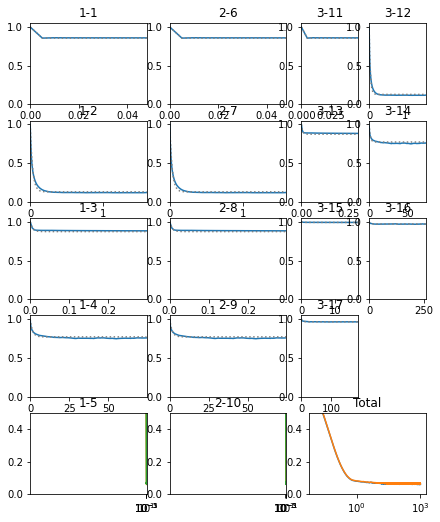

In [8]:
creat_split_plots(data[0])

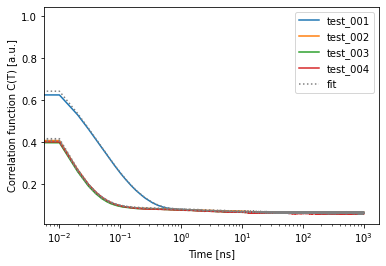

In [9]:
for out in data:
        plt.semilogx(out['t'][:tf>>1],out['ct'].mean(0)[:tf>>1])
for out in data:
        plt.semilogx(out['t'][:tf>>1],out['ct_prod'].mean(0)[:tf>>1],color='grey',linestyle=':')
legend_list = test_list + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
#plt.title("Total Correlation Function")
plt.legend(legend_list)
plt.savefig("/home/mlehner/pyDR/out_figures/report/plot00.png")

In [10]:
include[0]

array([ True,  True,  True, False, False, False, False, False, False])

/home/mlehner/anaconda3/envs/pyDR/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in square
  # This is added back by InteractiveShellApp.init_path()
/home/mlehner/anaconda3/envs/pyDR/lib/python3.7/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/mlehner/anaconda3/envs/pyDR/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/home/mlehner/anaconda3/envs/pyDR/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/home/mlehner/anaconda3/envs/pyDR/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in square
  # This is added back by InteractiveShellApp.init_path()
/home/mlehner/anaconda3/envs/pyDR/

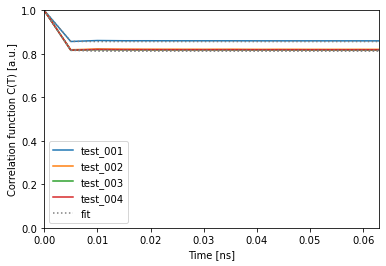

In [11]:
for out in data:    
    ct = out['ct_finF'][0]
    plt.plot(t,ct.mean(0)[:tf>>1])
plt.legend(test_list)
for out in data:
    ct = out['ct_finF'][0]
    S2=ct.mean(0)[tf>>2:tf>>1].mean()
    b=np.argwhere(ct.mean(0)-S2<0)[0,0]
    #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
    tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
    fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
    S2,tc=least_squares(fun,[S2,tc0]).x
    plt.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
plt.xlim([0,50*tc])
plt.ylim([0,1])
legend_list = test_list + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
#plt.title("Correlation function of methyl rotations")
plt.legend(legend_list)
plt.savefig("/home/mlehner/pyDR/out_figures/report/plot01.png")

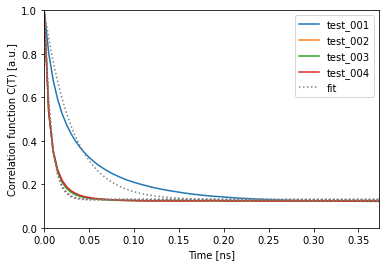

In [12]:
for out in data:    
    ct = out['ct_finF'][1]
    plt.plot(t,ct.mean(0)[:tf>>1])
plt.legend(test_list)
for out in data:
    ct = out['ct_finF'][1]
    S2=ct.mean(0)[tf>>2:tf>>1].mean()
    b=np.argwhere(ct.mean(0)-S2<0)[0,0]
    #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
    tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
    fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
    S2,tc=least_squares(fun,[S2,tc0]).x
    plt.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
plt.xlim([0,50*tc])
plt.ylim([0,1])
legend_list = test_list + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
#plt.title("Correlation function of chi2")
plt.legend(legend_list)
plt.savefig("/home/mlehner/pyDR/out_figures/report/plot02.png")

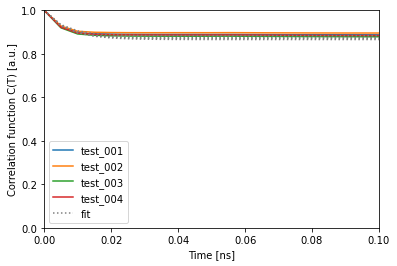

In [13]:
for out in data:    
    ct = out['ct_finF'][2]
    plt.plot(t,ct.mean(0)[:tf>>1])
plt.legend(test_list)
for out in data:
    ct = out['ct_finF'][2]
    S2=ct.mean(0)[tf>>2:tf>>1].mean()
    b=np.argwhere(ct.mean(0)-S2<0)[0,0]
    #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
    tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
    fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
    S2,tc=least_squares(fun,[S2,tc0]).x
    plt.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
plt.xlim([0,0.1])
plt.ylim([0,1])
legend_list = test_list + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
#plt.title("Correlation function of chi1")
plt.legend(legend_list)
plt.savefig("/home/mlehner/pyDR/out_figures/report/plot03.png")

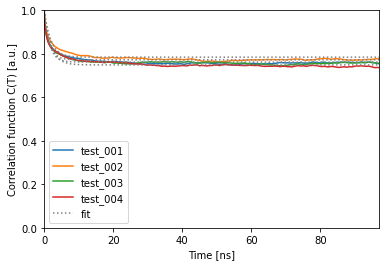

In [14]:
for out in data:    
    ct = out['ct_finF'][3]
    plt.plot(t,ct.mean(0)[:tf>>1])
plt.legend(test_list)
for out in data:
    ct = out['ct_finF'][3]
    S2=ct.mean(0)[tf>>2:tf>>1].mean()
    b=np.argwhere(ct.mean(0)-S2<0)[0,0]
    #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
    tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
    fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
    S2,tc=least_squares(fun,[S2,tc0]).x
    plt.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
plt.xlim([0,50*tc])
plt.ylim([0,1])
legend_list = test_list + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
#plt.title("Correlation function of the backbone")
plt.legend(legend_list)
plt.savefig("/home/mlehner/pyDR/out_figures/report/plot04.png")

In [15]:
out['ct'].shape

(42, 200000)

In [16]:
42-6

36

In [17]:
ile_test_list = [x+"_ile3" for x in test_list]

In [18]:
ile_test_list.extend([x+"_ile44" for x in test_list])

In [19]:
ile_test_list

['test_001_ile3',
 'test_002_ile3',
 'test_003_ile3',
 'test_004_ile3',
 'test_001_ile44',
 'test_002_ile44',
 'test_003_ile44',
 'test_004_ile44']

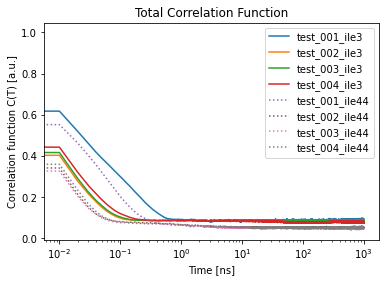

In [20]:
for out in data:
        plt.semilogx(out['t'][:tf>>1],out['ct'][0:6].mean(0)[:tf>>1])
for out in data:
        plt.semilogx(out['t'][:tf>>1],out['ct'][30:36].mean(0)[:tf>>1], linestyle=':')
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
plt.title("Total Correlation Function")
plt.legend(ile_test_list)
plt.savefig("/home/mlehner/pyDR/out_figures/report/plot_ile.png")

In [21]:
res_lsq_list = []
for i in range(4):
    asdf = []
    for out in data:
        ct = out['ct_finF'][i]
        S2=ct.mean(0)[tf>>2:tf>>1].mean()
        b=np.argwhere(ct.mean(0)-S2<0)[0,0]
        #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
        tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
        fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
        res_lsq = least_squares(fun,[S2,tc0])
        S2,tc=res_lsq.x
        asdf.append([S2, tc])
        print(S2, tc)
    res_lsq_list.append(asdf)

/home/mlehner/anaconda3/envs/pyDR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in square
  # Remove the CWD from sys.path while we load stuff.
/home/mlehner/anaconda3/envs/pyDR/lib/python3.7/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/mlehner/anaconda3/envs/pyDR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


0.8565013835128108 0.0009575696950143087
0.8166648133953339 0.0011584946610600918
0.8132620062481585 0.0012107212542506196
0.8137337462834642 0.001259640101722006
0.12839642858405376 0.03181617081000615
0.1288950947412681 0.007554818140403452
0.12778504038905575 0.007304292725195738
0.13234412408796978 0.007459249013535623
0.874152540924051 0.0059512479084538345
0.8837670351016109 0.006005497011600803
0.8659195115520965 0.006816617911274223
0.8706612436387396 0.006475720258107679
0.7725289353950734 1.485790520175973
0.7847966164039463 1.9137032185259755
0.7621631487548094 1.5060738578619333
0.7490986528580396 1.9392379866516702


In [22]:
for i in res_lsq_list[2]:
   print(f" & {i[0]:.5f} & {i[1]:.5f}")

 & 0.87415 & 0.00595
 & 0.88377 & 0.00601
 & 0.86592 & 0.00682
 & 0.87066 & 0.00648


In [23]:
for i in res_lsq_list[1]:
   print(f" & {i[0]:.5f} & {i[1]:.5f}")

 & 0.12840 & 0.03182
 & 0.12890 & 0.00755
 & 0.12779 & 0.00730
 & 0.13234 & 0.00746


In [24]:
res_lsq_matrix=np.array(res_lsq_list)

In [25]:
res_lsq_matrix

array([[[8.56501384e-01, 9.57569695e-04],
        [8.16664813e-01, 1.15849466e-03],
        [8.13262006e-01, 1.21072125e-03],
        [8.13733746e-01, 1.25964010e-03]],

       [[1.28396429e-01, 3.18161708e-02],
        [1.28895095e-01, 7.55481814e-03],
        [1.27785040e-01, 7.30429273e-03],
        [1.32344124e-01, 7.45924901e-03]],

       [[8.74152541e-01, 5.95124791e-03],
        [8.83767035e-01, 6.00549701e-03],
        [8.65919512e-01, 6.81661791e-03],
        [8.70661244e-01, 6.47572026e-03]],

       [[7.72528935e-01, 1.48579052e+00],
        [7.84796616e-01, 1.91370322e+00],
        [7.62163149e-01, 1.50607386e+00],
        [7.49098653e-01, 1.93923799e+00]]])

In [26]:
res_lsq_matrix[:,0]

array([[8.56501384e-01, 9.57569695e-04],
       [1.28396429e-01, 3.18161708e-02],
       [8.74152541e-01, 5.95124791e-03],
       [7.72528935e-01, 1.48579052e+00]])

In [27]:
test_0_res_lsq = res_lsq_matrix[:,0]

In [28]:
for i in range(4):
    line = res_lsq_matrix[:,i]
    print(f"test_{i+1} & {line[0,1]:.5f} & {line[1,1]:.5f} & {line[2,1]:.5f} & {line[3,1]:.5f} \\")

test_1 & 0.00096 & 0.03182 & 0.00595 & 1.48579 \
test_2 & 0.00116 & 0.00755 & 0.00601 & 1.91370 \
test_3 & 0.00121 & 0.00730 & 0.00682 & 1.50607 \
test_4 & 0.00126 & 0.00746 & 0.00648 & 1.93924 \


In [29]:
for i in range(4):
    line = res_lsq_matrix[:,i]
    print(f"test_{i+1} & {line[0,0]:.5f} & {line[1,0]:.5f} & {line[2,0]:.5f} & {line[3,0]:.5f}")

test_1 & 0.85650 & 0.12840 & 0.87415 & 0.77253
test_2 & 0.81666 & 0.12890 & 0.88377 & 0.78480
test_3 & 0.81326 & 0.12779 & 0.86592 & 0.76216
test_4 & 0.81373 & 0.13234 & 0.87066 & 0.74910


In [35]:
res_lsq_matrix[0,0]

array([0.85650138, 0.00095757])

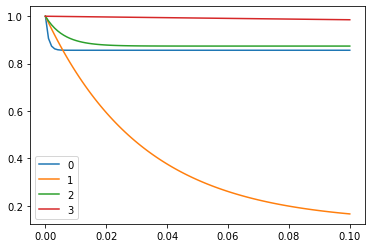

In [45]:
line = res_lsq_matrix[:,0]
for S2, tc in line:
    t=np.linspace(0,0.1,100)
    plt.plot(t,S2+(1-S2)*np.exp(-t/tc))
plt.legend(["0","1","2","3"])
plt.show()

In [55]:
print(f"# test & t_c(methyl)[ns] & t_c(\chi2)[ns] & t_c(\chi1)[ns] & t_c(backbone)[ns] \\\\ \\hline ")
for i in range(4):
    line = res_lsq_matrix[:,i]
    s = 1000
    print(f"test_{i+1} & {s*line[1,1]:.2f} & {s*line[0,1]:.2f} & {s*line[2,1]:.2f} & {s*line[3,1]:.0f} \\\\")
print("\n\n")
print(f"# test & S^2(methyl) & S^2(\chi2) & S^2(\chi1) & S^2(backbone) \\\\ \\hline")
for i in range(4):
    line = res_lsq_matrix[:,i]
    print(f"test_{i+1} & {line[1,0]:.5f} & {line[0,0]:.5f} & {line[2,0]:.5f} & {line[3,0]:.5f} \\\\")

# test & t_c(methyl)[ns] & t_c(\chi2)[ns] & t_c(\chi1)[ns] & t_c(backbone)[ns] \\ \hline 
test_1 & 31.82 & 0.96 & 5.95 & 1486 \\
test_2 & 7.55 & 1.16 & 6.01 & 1914 \\
test_3 & 7.30 & 1.21 & 6.82 & 1506 \\
test_4 & 7.46 & 1.26 & 6.48 & 1939 \\



# test & S^2(methyl) & S^2(\chi2) & S^2(\chi1) & S^2(backbone) \\ \hline
test_1 & 0.12840 & 0.85650 & 0.87415 & 0.77253 \\
test_2 & 0.12890 & 0.81666 & 0.88377 & 0.78480 \\
test_3 & 0.12779 & 0.81326 & 0.86592 & 0.76216 \\
test_4 & 0.13234 & 0.81373 & 0.87066 & 0.74910 \\


In [30]:
len(res_lsq_list)

4

In [31]:
res_lsq = res_lsq_list[0]

In [32]:
res_lsq

[[0.8565013835128108, 0.0009575696950143087],
 [0.8166648133953339, 0.0011584946610600918],
 [0.8132620062481585, 0.0012107212542506196],
 [0.8137337462834642, 0.001259640101722006]]

In [33]:
res_lsq_list

[[[0.8565013835128108, 0.0009575696950143087],
  [0.8166648133953339, 0.0011584946610600918],
  [0.8132620062481585, 0.0012107212542506196],
  [0.8137337462834642, 0.001259640101722006]],
 [[0.12839642858405376, 0.03181617081000615],
  [0.1288950947412681, 0.007554818140403452],
  [0.12778504038905575, 0.007304292725195738],
  [0.13234412408796978, 0.007459249013535623]],
 [[0.874152540924051, 0.0059512479084538345],
  [0.8837670351016109, 0.006005497011600803],
  [0.8659195115520965, 0.006816617911274223],
  [0.8706612436387396, 0.006475720258107679]],
 [[0.7725289353950734, 1.485790520175973],
  [0.7847966164039463, 1.9137032185259755],
  [0.7621631487548094, 1.5060738578619333],
  [0.7490986528580396, 1.9392379866516702]]]